In [ ]:
# Created: 20250104

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: py311; pyv: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


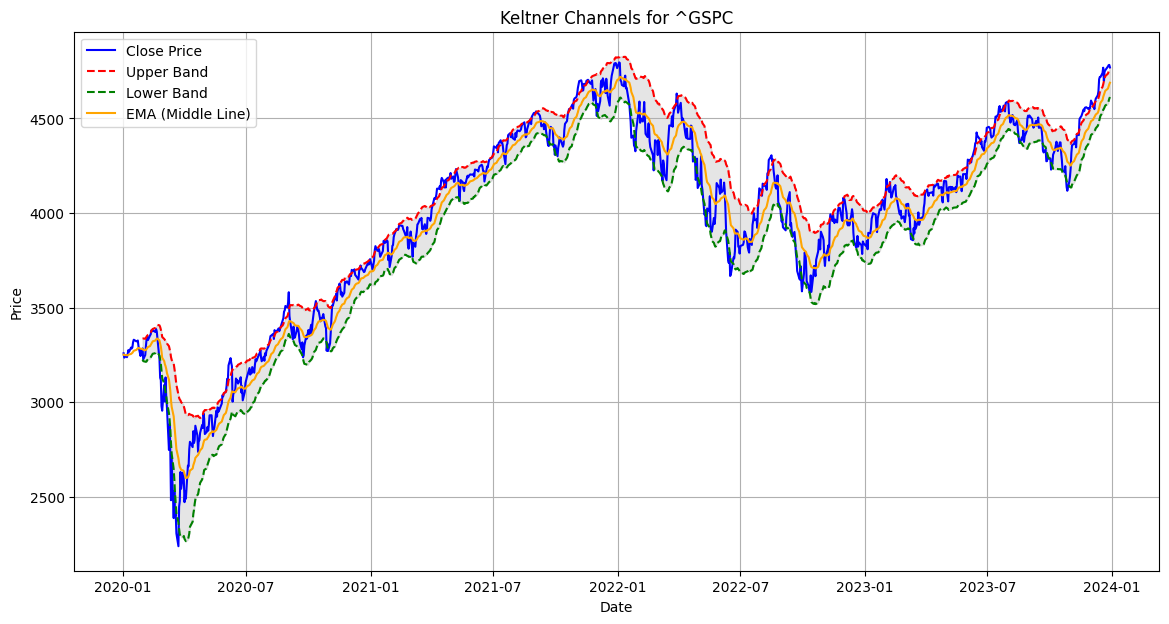

In [4]:
# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2020-01-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)

# Step 2: Calculate Keltner Channels
def keltner_channels(data, window=20, multiplier=2):
    # Calculate typical price
    data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
    
    # Calculate EMA of typical price
    data['EMA'] = data['Typical Price'].ewm(span=window, adjust=False).mean()
    
    # Calculate Average True Range (ATR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-Close'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-Close'] = abs(data['Low'] - data['Close'].shift(1))
    data['True Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    data['ATR'] = data['True Range'].rolling(window=window).mean()
    
    # Calculate upper and lower bands
    data['Upper Band'] = data['EMA'] + (multiplier * data['ATR'])
    data['Lower Band'] = data['EMA'] - (multiplier * data['ATR'])
    
    return data

# Apply Keltner Channel function
data = keltner_channels(data)

# Step 3: Plot the data with Keltner Channels
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='--')
plt.plot(data['EMA'], label='EMA (Middle Line)', color='orange')
plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.2)
plt.title(f'Keltner Channels for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [5]:
# Step 2: Calculate Keltner Channels
def keltner_channels(data, window=20, multiplier=2):
    # Calculate typical price
    data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
    
    # Calculate EMA of typical price
    data['EMA'] = data['Typical Price'].ewm(span=window, adjust=False).mean()
    
    # Calculate Average True Range (ATR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-Close'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-Close'] = abs(data['Low'] - data['Close'].shift(1))
    data['True Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    data['ATR'] = data['True Range'].rolling(window=window).mean()
    
    # Calculate upper and lower bands
    data['Upper Band'] = data['EMA'] + (multiplier * data['ATR'])
    data['Lower Band'] = data['EMA'] - (multiplier * data['ATR'])
    
    return data

In [6]:
def show_keltner_bands(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)

    # Apply Keltner Channel function
    data = keltner_channels(data)
    
    # Step 3: Plot the data with Keltner Channels
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='--')
    plt.plot(data['EMA'], label='EMA (Middle Line)', color='orange')
    plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.2)
    plt.title(f'Keltner Channels for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


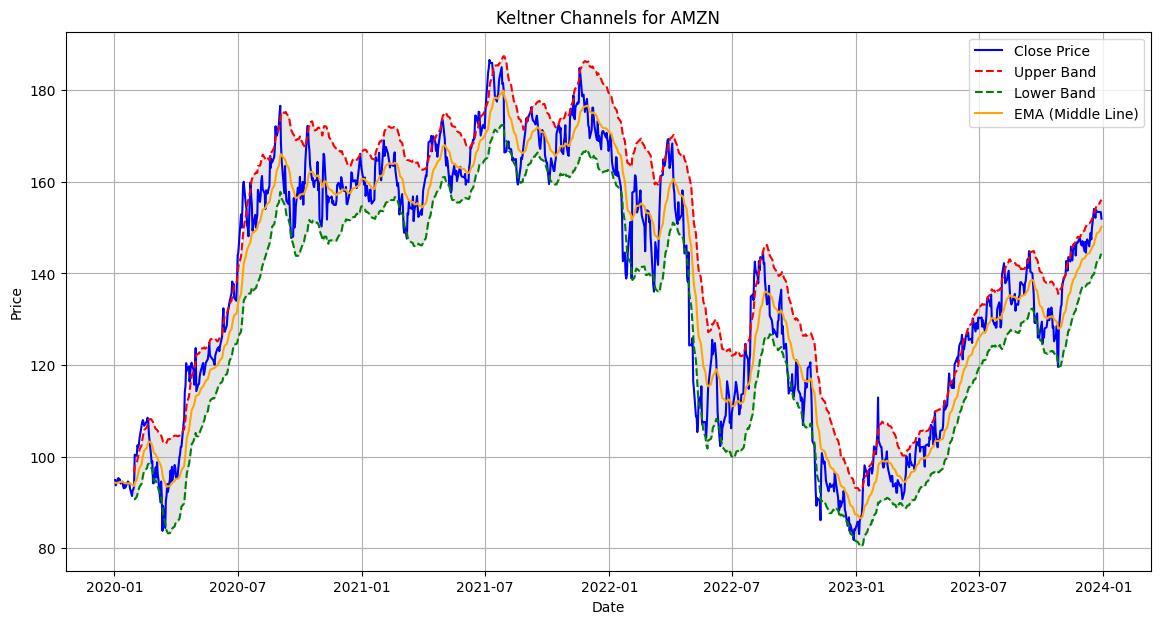

In [7]:
show_keltner_bands("AMZN")